## 問題

### 参考にした動画
https://www.youtube.com/watch?v=xmzVjp6jcDw&list=PLLOXIILi9i-fCNoyzi3QgSjFxTnviF8C2&index=5
https://www.youtube.com/watch?v=Dvk_0uXlxVs&list=PLLOXIILi9i-fCNoyzi3QgSjFxTnviF8C2&index=6
https://www.youtube.com/watch?v=55LCk4UYueU&list=PLLOXIILi9i-fCNoyzi3QgSjFxTnviF8C2&index=7

問題2,3がちょっと難しいが、計算慣れればいけそうな感じ。

## 累積分布関数と生存関数

累積分布関数（CDF: Cumulative Distribution Function）と生存関数（Survival Function）は、確率論と統計学で重要な概念です。それぞれの定義と特性を詳しく説明します。

### 累積分布関数（CDF）

累積分布関数 $F(x)$ は、確率変数 $X$ が値 $x$ 以下である確率を表します。具体的には、

$$
F(x) = P(X \leq x)
$$

CDFの特性は以下の通りです：
1. $F(x)$ は常に $0 \leq F(x) \leq 1$ の範囲内の値を取ります。
2. $F(x)$ は非減少関数です。つまり、$x_1 < x_2$ のとき、$F(x_1) \leq F(x_2)$ となります。
3. $\lim_{x \to -\infty} F(x) = 0$ かつ $\lim_{x \to \infty} F(x) = 1$ です。

### 生存関数

生存関数 $S(x)$ は、確率変数 $X$ が値 $x$ より大きい確率を表します。具体的には、

$$
S(x) = P(X > x)
$$

生存関数は累積分布関数と次のような関係があります：

$$
S(x) = 1 - F(x)
$$

生存関数の特性は以下の通りです：
1. $S(x)$ は常に $0 \leq S(x) \leq 1$ の範囲内の値を取ります。
2. $S(x)$ は非増加関数です。つまり、$x_1 < x_2$ のとき、$S(x_1) \geq S(x_2)$ となります。
3. $\lim_{x \to -\infty} S(x) = 1$ かつ $\lim_{x \to \infty} S(x) = 0$ です。

### 具体例

標準正規分布を例に取ります。確率変数 $X$ が標準正規分布に従うとき、その累積分布関数 $F(x)$ と生存関数 $S(x)$ は以下のように表されます。

- 累積分布関数 $F(x)$ は標準正規分布の累積分布関数です。通常は $\Phi(x)$ で表され、特定の値は数表や数値計算で求められます。
- 生存関数 $S(x)$ は $1 - \Phi(x)$ となります。

#### Pythonでの実装例

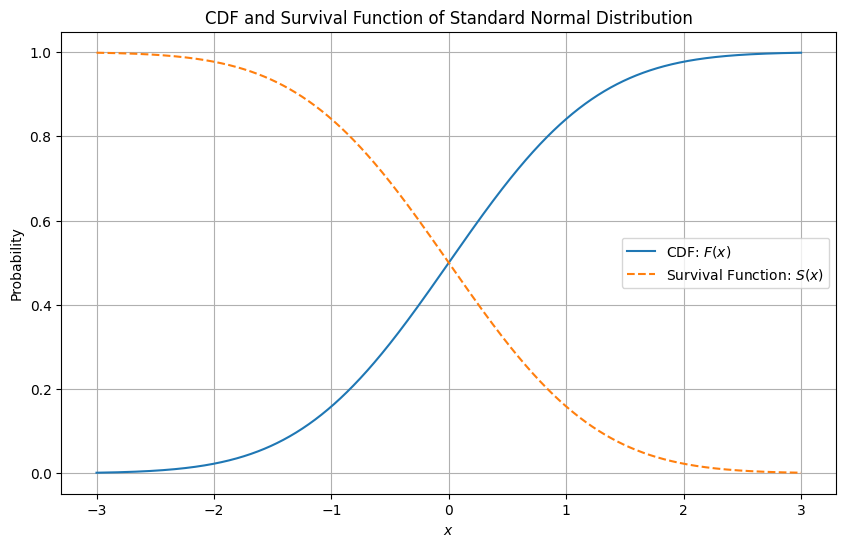

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# xの範囲を定義
x = np.linspace(-3, 3, 1000)

# 標準正規分布の累積分布関数
cdf = norm.cdf(x)

# 生存関数
survival_function = 1 - cdf


plt.figure(figsize=(10, 6))
plt.plot(x, cdf, label='CDF: $F(x)$')
plt.plot(x, survival_function, label='Survival Function: $S(x)$', linestyle='--')
plt.title('CDF and Survival Function of Standard Normal Distribution')
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()


## ハザード関数

ハザード関数（Hazard Function）は、信頼性工学や生存分析で重要な概念で、特定の時点における瞬間的なイベント発生率を示します。累積分布関数（CDF）や生存関数との関係も深いです。

### 定義

ハザード関数 $h(t)$ は、時点 $t$ での瞬間的なイベント発生率を表します。具体的には、次のように定義されます：

$$
h(t) = \lim_{\Delta t \to 0} \frac{P(t \leq T < t + \Delta t \mid T \geq t)}{\Delta t}
$$

これは、時点 $t$ においてまだ生存している（または故障していない）場合に、次の瞬間 $\Delta t$ の間にイベントが発生する条件付き確率を表しています。

### 累積ハザード関数

累積ハザード関数 $H(t)$ は、時点 $0$ から $t$ までのハザード関数の累積値を表し、次のように定義されます：

$$
H(t) = \int_0^t h(u) \, du
$$

### ハザード関数と生存関数の関係

ハザード関数 $h(t)$ と生存関数 $S(t)$ の関係は次のように表されます：

$$
h(t) = -\frac{d}{dt} \log S(t)
$$

生存関数 $S(t)$ はハザード関数を使って次のように表されます：

$$
S(t) = \exp\left(-H(t)\right) = \exp\left(-\int_0^t h(u) \, du\right)
$$

### 具体例

指数分布を例に取ります。確率変数 $T$ がパラメータ $\lambda$ の指数分布に従うとき、そのハザード関数 $h(t)$ は定数 $\lambda$ になります。

#### Pythonでの実装例


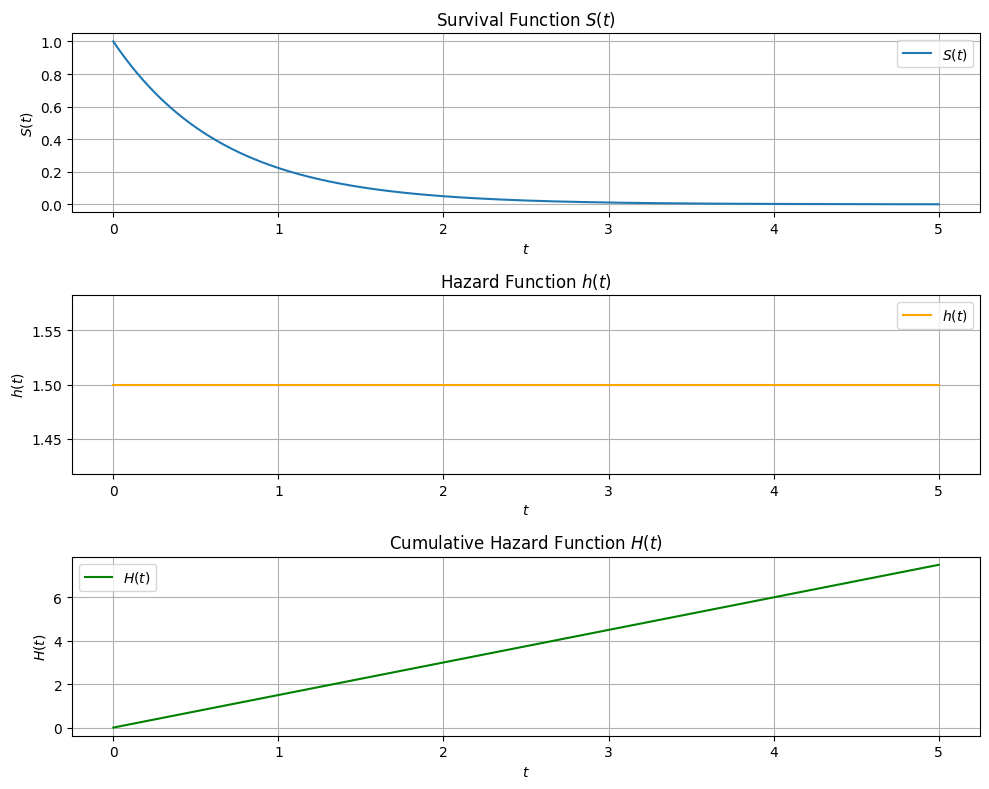

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# パラメータの定義
lambda_param = 1.5

# tの範囲を定義
t = np.linspace(0, 5, 1000)

# 生存関数 S(t)
S_t = np.exp(-lambda_param * t)

# ハザード関数 h(t)
h_t = np.full_like(t, lambda_param)

# 累積ハザード関数 H(t)
H_t = lambda_param * t

# プロット
plt.figure(figsize=(10, 8))

# 生存関数
plt.subplot(3, 1, 1)
plt.plot(t, S_t, label='$S(t)$')
plt.title('Survival Function $S(t)$')
plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.grid()
plt.legend()

# ハザード関数
plt.subplot(3, 1, 2)
plt.plot(t, h_t, label='$h(t)$', color='orange')
plt.title('Hazard Function $h(t)$')
plt.xlabel('$t$')
plt.ylabel('$h(t)$')
plt.grid()
plt.legend()

# 累積ハザード関数
plt.subplot(3, 1, 3)
plt.plot(t, H_t, label='$H(t)$', color='green')
plt.title('Cumulative Hazard Function $H(t)$')
plt.xlabel('$t$')
plt.ylabel('$H(t)$')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### 同時分布、周辺分布、条件付き分布の意味と例

ざっくり言うと、

全部細かく表すのが同時分布

「合計」を表すのが周辺分布

一部を固定したのが条件付き分布

https://mathwords.net/doujibunpu

## 演習問題
さっぱりわからん！！！！